This notebook contains code to measure the burden of deleterious variation from STRs

In [343]:
%pylab inline

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
from matplotlib import pyplot as plt
import sys
sys.path.append("/storage/BonnieH/selection_project/helper_functions")
from Simulation_functions import *

Populating the interactive namespace from numpy and matplotlib


/storage/BonnieH/anaconda/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['sample', 'copy', 'info']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [344]:
calc_de_novo = True # Whether to calculate de novo burden or oonly standing variation

In [345]:
# Note: To measure the deleterious burden of variation at STRs, first perform the following commands in the directory `/storage/BonnieH/selection_project/1000genomes/euro_allele_freqs` to preprocess the data 
# Susbsititue NA10865 with the sample you want to analayze
# Substitute CEU_de_novos.csv with IBS_de_novos.csv depending on the population the sample comes from
'''
awk 'NR==FNR{c[$1$2]++;next};c[$1$2] > 0 {print $1"\t"$2"\t"$3"\t"$4}' 1kg_sistr_scores_non_intergenic.txt NA10865.txt > NA10865_filt.txt

cat CEU_de_novos.csv | awk '$6 == "NA10865" { print }'  > NA10865_de_novos.txt

cut  -f 1,2,9 NA10865_de_novos.txt > NA10865_de_novos_final.txt
sed -i 's/chr//' NA10865_de_novos_final.txt

sort  -n -k1,1 -k2,2 NA10865_de_novos_final.txt > NA10865_de_novos_sort.txt

awk 'NR==FNR{c[$1$2]++;next};c[$1$2] > 0 {print $1"\t"$2"\t"$3"\t"$4}' 1kg_sistr_scores_non_intergenic.txt NA10865_de_novos_sort.txt> NA10865_de_novos_sort_filt.txt

awk 'NR==FNR{c[$1$2]++;next};c[$1$2] > 0 {print $1"\t"$2"\t"$3"\t"$4"\t"$5"\t"$6"\t"$7"\t"$8"\t"$9"\t"$10}' NA10865_de_novos_sort_filt.txt 1kg_sistr_scores_non_intergenic.txt  > 1kg_sistr_scores_non_intergenic_NA10865.txt 

'''

'\nawk \'NR==FNR{c[$1$2]++;next};c[$1$2] > 0 {print $1"\t"$2"\t"$3"\t"$4}\' 1kg_sistr_scores_non_intergenic.txt NA10865.txt > NA10865_filt.txt\n\ncat CEU_de_novos.csv | awk \'$6 == "NA10865" { print }\'  > NA10865_de_novos.txt\n\ncut  -f 1,2,9 NA10865_de_novos.txt > NA10865_de_novos_final.txt\nsed -i \'s/chr//\' NA10865_de_novos_final.txt\n\nsort  -n -k1,1 -k2,2 NA10865_de_novos_final.txt > NA10865_de_novos_sort.txt\n\nawk \'NR==FNR{c[$1$2]++;next};c[$1$2] > 0 {print $1"\t"$2"\t"$3"\t"$4}\' 1kg_sistr_scores_non_intergenic.txt NA10865_de_novos_sort.txt> NA10865_de_novos_sort_filt.txt\n\nawk \'NR==FNR{c[$1$2]++;next};c[$1$2] > 0 {print $1"\t"$2"\t"$3"\t"$4"\t"$5"\t"$6"\t"$7"\t"$8"\t"$9"\t"$10}\' NA10865_de_novos_sort_filt.txt 1kg_sistr_scores_non_intergenic.txt  > 1kg_sistr_scores_non_intergenic_NA10865.txt \n\n'

In [346]:
'''
%%time
vcf_reader = vcf.Reader(filename='EUR_sans_FIN_filtered_keep_w_scores.vcf.gz')
i = 0
results = open('NA06985.txt', "w")
results.write("chrom" + "\t" + "start" + "\t" + "genotype1" + "\t" + "genotype2" + "\n")
for record in vcf_reader:
    i = i + 1
    if i%1000 == 0:
        print(i)
   
    call = record.genotype('NA06985')
    if call['REPCN'] is None:
        geno1 = 0
        geno2 = 0
    else:
        geno1 = call['REPCN'][0]
        geno2 = call['REPCN'][1]
        
    results.write(record.CHROM[3:] + '\t' + str(record.POS) + '\t' + str(geno1) + '\t' + str(geno2) + '\n')
    
results.close()
'''

'\n%%time\nvcf_reader = vcf.Reader(filename=\'EUR_sans_FIN_filtered_keep_w_scores.vcf.gz\')\ni = 0\nresults = open(\'NA06985.txt\', "w")\nresults.write("chrom" + "\t" + "start" + "\t" + "genotype1" + "\t" + "genotype2" + "\n")\nfor record in vcf_reader:\n    i = i + 1\n    if i%1000 == 0:\n        print(i)\n   \n    call = record.genotype(\'NA06985\')\n    if call[\'REPCN\'] is None:\n        geno1 = 0\n        geno2 = 0\n    else:\n        geno1 = call[\'REPCN\'][0]\n        geno2 = call[\'REPCN\'][1]\n        \n    results.write(record.CHROM[3:] + \'\t\' + str(record.POS) + \'\t\' + str(geno1) + \'\t\' + str(geno2) + \'\n\')\n    \nresults.close()\n'

In [347]:
# Read in joint results
joint_results = {}
sistr2_scores_file = open('/storage/BonnieH/selection_project/analysis/SISTR2_scores_by_motif.txt', 'r')
sistr2_scores_file.readline()
for line in sistr2_scores_file:
    info = line.strip().split('\t')
    period = int(info[0])
    optimal_ru = int(info[1])
    motif = info[2]
    est_a = float(info[4])
    est_b = float(info[5])
    joint_results[(period,optimal_ru,motif)] = (est_a,est_b)
print(joint_results)
sistr2_scores_file.close()

{(2, 11, 'AT'): (0.6296529, 6.14e-05), (2, 12, 'AT'): (0.5882184, 3.17e-05), (2, 13, 'AT'): (0.2487026, 0.0002044), (2, 14, 'AT'): (0.8952737, 8.26e-05), (2, 15, 'AT'): (0.2537753, 8.02e-05), (2, 16, 'AT'): (0.8121238, 9.35e-05), (2, 17, 'AT'): (0.6352325, 7.09e-05), (2, 18, 'AT'): (0.0845467, 0.0002004), (2, 19, 'AT'): (0.9712703, 2.95e-05), (2, 20, 'AT'): (0.57922, 0.0002743), (2, 11, 'AG'): (0.873439, 0.0006798), (2, 12, 'AG'): (0.2238964, 0.002888), (2, 13, 'AG'): (0.4384836, 0.0001898), (2, 14, 'AG'): (0.0787858, 0.0053019), (2, 15, 'AG'): (0.0185307, 0.0008074), (2, 16, 'AG'): (0.2738581, 4.82e-05), (2, 17, 'AG'): (0.0361351, 0.003711), (2, 18, 'AG'): (0.3141738, 6.34e-05), (2, 19, 'AG'): (0.3057551, 9.16e-05), (2, 20, 'AG'): (0.5150636, 9.6e-05), (2, 11, 'AC'): (0.0935982, 0.0013493), (2, 12, 'AC'): (0.0704712, 0.0002003), (2, 13, 'AC'): (0.3592225, 0.0001424), (2, 14, 'AC'): (0.8744295, 6.03e-05), (2, 15, 'AC'): (0.8798988, 0.0002187), (2, 16, 'AC'): (0.2907548, 0.0004035), (2,

In [348]:
#sample = 'HG02234'
#sample = 'HG02237'
#sample = 'HG02240'
#sample = 'NA06985'
#sample = 'NA06986'
#sample = 'NA06994'
#sample = 'HG01520'
sample = 'NA12864' # Change sample name based on the sample you would like to analyze

# Calculate burden from standing variation
sample_info_file = open('/storage/BonnieH/selection_project/1000genomes/euro_allele_freqs/' + sample + '_filt.txt', 'r')
sistr_scores_file = open('/storage/BonnieH/selection_project/1000genomes/euro_allele_freqs/1kg_sistr_scores_non_intergenic.txt', 'r') #SISTR_per_locus_scores.txt
sample_info_file.readline()
sistr_scores_file.readline()

burden_list = []
burden_list_joint = []
de_novo_burden_list = []
de_novo_burden_list_joint = []
de_novo_diff_list = []
diff_list = []
count_loci = 0
count_na = 0
for line1, line2 in zip(sistr_scores_file, sample_info_file):
    
    # Get information from line
    info = line1.strip().split('\t')
    chrom = info[0]
    start = int(info[1])
    
    per = int(info[4])
    
    opt_allele = int(info[5])
    if 1==1: # and per == 4: # and opt_allele >4:
        motif = info[6]
        s = info[7]
        if s == 'N/A':
            count_na = count_na + 1

        info = line2.strip().split('\t')
        chromosome = info[0]
        pos = int(info[1])
        if chromosome != chrom or start != pos:
            print('Does not match')
            print((chrom, chromosome))
            print((start, pos))
        geno1 = int(info[2])
        geno2 = int(info[3])
        
        if geno1 != 0 and geno2 != 0:# and s != 'N/A' and (per, opt_allele, motif) in joint_results:

            count_loci = count_loci + 1
            diff1 = geno1 - opt_allele
            diff2 = geno2 - opt_allele
            if diff1 != 0:
                diff_list.append(diff1)
            if diff2 != 0:
                diff_list.append(diff2)

            # Calculate joint burden
            
            #if per == 3 and opt_allele > 13: 
                #opt_allele = 13
            #if per == 3 and opt_allele < 5:
                #opt_allele = 5

            #if per == 4 and opt_allele > 10:
                #opt_allele = 10
            #if per == 4 and opt_allele < 7:
                #opt_allele = 7

            #if per == 2 and opt_allele > 20:
                #opt_allele = 20
            #if per == 2 and opt_allele < 11:
                #opt_allele = 11

            if (per, opt_allele, motif) in joint_results:
                a = joint_results[(per, opt_allele, motif)][0]
                b = joint_results[(per, opt_allele, motif)][1]
                s_val = np.random.gamma(a, b)
                if s_val > 1:
                    s_val = 1

                burden1 = abs(diff1*s_val)
                burden2 = abs(diff2*s_val)
                if burden1 > 1:
                    burden1 = 1
                if burden2 > 1:
                    burden2 = 1
                if diff1 != 0:
                    burden_list_joint.append(burden1)
                if diff2 != 0:
                    burden_list_joint.append(burden2)
                    
            # Calculate per-locus burden
            if s != 'N/A':
                s = float(s)

                burden1 = abs(diff1*s)
                burden2 = abs(diff2*s)
                if burden1 > 1:
                    burden1 = 1
                if burden2 > 1:
                    burden2 = 1
                if diff1 != 0:
                    burden_list.append(burden1)
                if diff2 != 0:
                    burden_list.append(burden2)   
    
sistr_scores_file.close()
sample_info_file.close()
print(count_na)

1937


In [349]:
# Calculate burden from de novo mutations
if calc_de_novo == True:
    sample_info_file = open('/storage/BonnieH/selection_project/1000genomes/euro_allele_freqs/' + sample+'_de_novos_sort_filt.txt', 'r')
    sistr_scores_file = open('/storage/BonnieH/selection_project/1000genomes/euro_allele_freqs/1kg_sistr_scores_non_intergenic_%s.txt'%(sample), 'r') #SISTR_per_locus_scores.txt
    sample_info_file.readline()
    sistr_scores_file.readline()

    count_loci_de_novo = 0
    count_na_de_novo = 0

    for line1, line2 in zip(sistr_scores_file, sample_info_file):

        # Get information from line
        info = line1.strip().split('\t')
        chrom = info[0]
        start = int(info[1])

        per = int(info[4])

        opt_allele = int(info[5])
        if 1==1:# and per == 4:# and opt_allele >4:
            motif = info[6]
            s = info[7]
            if s == 'N/A':
                count_na_de_novo = count_na_de_novo + 1


            info = line2.strip().split('\t')
            chromosome = info[0]
            pos = int(info[1])
            if chromosome != chrom or start != pos:
                print('Does not match')
                print((chrom, chromosome))
                print((start, pos))
            geno1 = int(info[2])

            if geno1 != 0:

                count_loci_de_novo = count_loci_de_novo + 1
                diff1 = geno1 - opt_allele

                if diff1 != 0:
                    de_novo_diff_list.append(diff1)

                # Calculate joint burden
                #if per == 3 and opt_allele > 13: 
                    #opt_allele = 13
                #if per == 3 and opt_allele < 5:
                    #opt_allele = 5

                #if per == 4 and opt_allele > 10:
                    #opt_allele = 10
                #if per == 4 and opt_allele < 7:
                    #opt_allele = 7

                #if per == 2 and opt_allele > 20:
                    #opt_allele = 20
                #if per == 2 and opt_allele < 11:
                    #opt_allele = 11

                if (per, opt_allele, motif) in joint_results:
                    a = joint_results[(per, opt_allele, motif)][0]
                    b = joint_results[(per, opt_allele, motif)][1]
                    s_val = np.random.gamma(a, b)
                    if s_val > 1:
                        s_val = 1

                    burden1 = abs(diff1*s_val)

                    if burden1 > 1:
                        burden1 = 1

                    if diff1 != 0:
                        de_novo_burden_list_joint.append(burden1)

                # Calculate per-locus burden
                if s != 'N/A':
                    s = float(s)

                    burden1 = abs(diff1*s)

                    if burden1 > 1:
                        burden1 = 1

                    if diff1 != 0:
                        de_novo_burden_list.append(burden1)

    sistr_scores_file.close()
    sample_info_file.close()
    print(count_na)

1937


Text(0.5, 1.0, 'NA12864 \n Number of alleles with variation: 22178/78954')

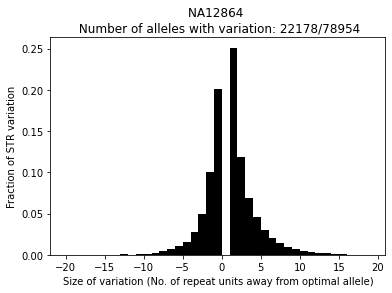

In [350]:
plt.hist(diff_list, color='black', bins = np.arange(-20,20,1), weights = np.ones_like(diff_list)/len(diff_list))
plt.xlabel('Size of variation (No. of repeat units away from optimal allele)')
plt.ylabel('Fraction of STR variation')
plt.title('%s \n Number of alleles with variation: %d/%d'%(sample, len(diff_list), count_loci*2))
#print(diff_list)

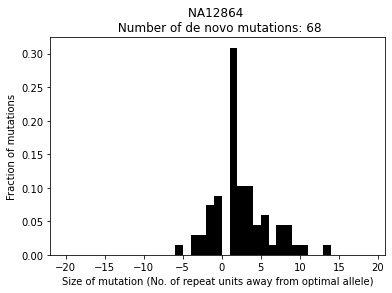

In [351]:
if calc_de_novo == True:
    plt.hist(de_novo_diff_list, color='black', bins = np.arange(-20,20,1), weights = np.ones_like(de_novo_diff_list)/len(de_novo_diff_list))
    plt.xlabel('Size of mutation (No. of repeat units away from optimal allele)')
    plt.ylabel('Fraction of mutations')
    plt.title('%s \n Number of de novo mutations: %d'%(sample, len(de_novo_diff_list)))
    #print(diff_list)

In [352]:
def get_svals(burden):
    svals = [0, 0, 0, 0, 0] 
    for elem in burden:
        if elem < 10**-5:
            svals[0] += 1
        elif elem < 10**-4:
            svals[1] += 1
        elif elem < 10**-3:
            svals[2] += 1
        elif elem < 10**-2:
            svals[3] += 1
        elif elem >= 10**-2:
            svals[4] += 1

    total = sum(svals)
    for i in range(0, len(svals)):
        svals[i] = svals[i]/total
    return svals

In [353]:
def graph_burden_together(sample, burden_per_locus, burden_joint):
    svals_per_locus = get_svals(burden_per_locus)
    svals_joint = get_svals(burden_joint)
    
    # Plot discrete pdf of gamma distribution

    x = ['0<=s<10^-5', '10^-5<=s<10^-4','10^-4<=s<10^-3', '10^-3<=s<10^-2', 's>=10^-2']
    y_pos = np.arange(len(x))
    barWidth = 0.2
    r1 = np.arange(len(x))
    r2 = [y + barWidth for y in r1]

    # Make the plot

    plt.bar(r1, svals_per_locus, color='red', width=barWidth, label = 'Per-locus') 
    plt.bar(r2, svals_joint, color='blue', width=barWidth, label = 'Joint') 
    plt.xticks([r + barWidth/2 for r in range(len(x))], x)
    plt.xticks(rotation=15) 
    plt.xlabel("S value")
    plt.ylabel("Fraction of STR variation")
    plt.legend()
    plt.title("%s STR Reduction in Fitness \n Per-locus Burden = %.2f (Calculated from %d alleles) \n Joint Burden = %.2f (Calculated from %d alleles)" %(sample, np.sum(burden_per_locus), len(burden_per_locus),np.sum(burden_joint), len(burden_joint))) 
    #plt.savefig(PLOTDIR + "gamma_distribution_pdf_discrete_a_%.4f_b_%.4f.pdf"%(a, b), bbox_inches='tight')

In [354]:
def graph_all_together(sample, burden_list, burden_list_joint, de_novo_burden_list, de_novo_burden_list_joint):
    svals_per_locus = get_svals(burden_list)
    svals_joint = get_svals(burden_list_joint)
    svals_per_locus_de_novos = get_svals(de_novo_burden_list)
    svals_joint_de_novos = get_svals(de_novo_burden_list_joint)
    
    # Plot discrete pdf of gamma distribution

    x = ['0<=s<10^-5', '10^-5<=s<10^-4','10^-4<=s<10^-3', '10^-3<=s<10^-2', 's>=10^-2']
    y_pos = np.arange(len(x))
    barWidth = 0.2
    r1 = np.arange(len(x))
    r2 = [y + barWidth for y in r1]
    r3 = [y + 2*barWidth for y in r1]
    r4 = [y - barWidth for y in r1]

    # Make the plot

    
    plt.bar(r4, svals_per_locus, color='red', width=barWidth, label = 'Standing variation per-locus') 
    plt.bar(r1, svals_joint, color='blue', width=barWidth, label = 'Standing variation joint') 
    plt.bar(r2, svals_per_locus_de_novos, color='mistyrose', width=barWidth, label = 'De novo mutations per-locus')
    
    plt.bar(r3, svals_joint_de_novos, color='lightblue', width=barWidth, label = 'De novo mutations joint')
    plt.xticks([r + barWidth/2 for r in range(len(x))], x)
    plt.xticks(rotation=15) 
    plt.xlabel("S value")
    plt.ylabel("Fraction of STR variation")
    plt.legend() #bbox_to_anchor=(1.1, 1)
    #plt.title("%s STR Reduction in Fitness \n" %(sample) + 
            #  "Standing variation per-locus burden = %.2f (Calculated from %d alleles) \n Median burden: %.5f \n Standing variation joint burden = %.2f (Calculated from %d alleles) \n Median burden: %.5f" %(np.sum(burden_list), len(burden_list),np.median(burden_list), np.sum(burden_list_joint), len(burden_list_joint), np.median(burden_list_joint))
            # +"\n De novo mutations per-locus burden = %.2f (Calculated from %d alleles) \n Median burden: %.5f \n De novo mutations joint burden = %.2f (Calculated from %d alleles) \n Median burden: %.5f" %(np.sum(de_novo_burden_list), len(de_novo_burden_list),np.median(de_novo_burden_list), np.sum(de_novo_burden_list_joint), len(de_novo_burden_list_joint), np.median(de_novo_burden_list_joint))) 
    #plt.savefig(PLOTDIR + "gamma_distribution_pdf_discrete_a_%.4f_b_%.4f.pdf"%(a, b), bbox_inches='tight')
    plt.title("%s STR Reduction in Fitness \n" %(sample) + 
              "Standing variation per-locus burden = %.2f (Calculated from %d alleles) \n Standing variation joint burden = %.2f (Calculated from %d alleles)" %(np.sum(burden_list), len(burden_list), np.sum(burden_list_joint), len(burden_list_joint))
             +"\n De novo mutations per-locus burden = %.2f (Calculated from %d alleles)  \n De novo mutations joint burden = %.2f (Calculated from %d alleles)" %(np.sum(de_novo_burden_list), len(de_novo_burden_list), np.sum(de_novo_burden_list_joint), len(de_novo_burden_list_joint)))
    
    
    #plt.savefig(PLOTDIR + "gamma_distribution_pdf_discrete_a_%.4f_b_%.4f.pdf"%(a, b), bbox_inches='tight')

8.026469763174783e-08
0.9999999197353023


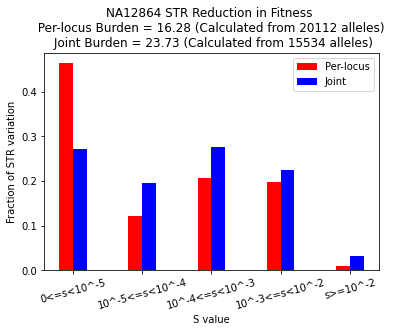

In [355]:
graph_burden_together(sample, burden_list, burden_list_joint)
# Calculate multiplicative burden
fitness = 1
for burden_value in burden_list:
    fitness = fitness * (1 - burden_value)
print(fitness)
print(1-fitness)
    

0.8647394687047478
0.13526053129525217


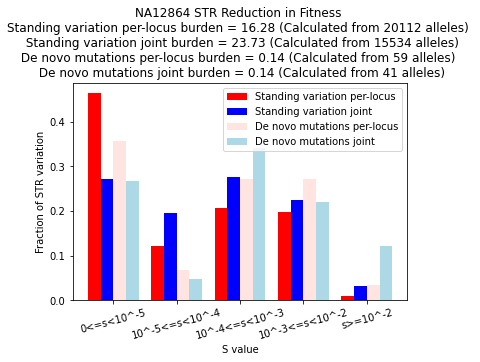

In [356]:
if calc_de_novo == True:
    graph_all_together(sample, burden_list, burden_list_joint, de_novo_burden_list, de_novo_burden_list_joint)
    
# Calculate multiplicative burden
fitness = 1
for burden_value in de_novo_burden_list:
    fitness = fitness * (1 - burden_value)
print(fitness)
print(1-fitness)
    

In [357]:
def getCDF(s_list):
    bins_list = [0]
    exponents = [10**-5, 10**-4, 10**-3, 10**-2]
    for j in exponents:
        for i in np.arange(1,10,0.01):
            bins_list.append(i*j)

    bins_list.append(0.1)
    bins_list.append(1)

    values, base = np.histogram(s_list, bins=bins_list)# [0,10**-5,10**-4,10**-3,10**-2,10**-1,1]#[0,10**-5,10**-4,10**-3,10**-2,10**-1,1]

    cumulative = list(np.cumsum(values))
    maximum = max(cumulative)
    cumulative_scaled = []
    for elem in cumulative:
        elem = elem/maximum
        cumulative_scaled.append(elem)

    #cum_dic[motif] = cumulative_scaled
    base_plot = base
    
    return cumulative_scaled, base_plot

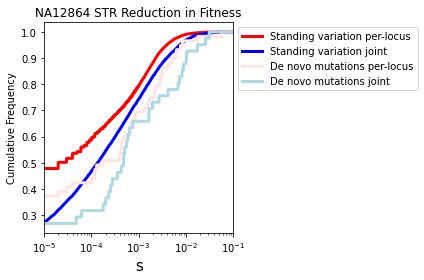

In [358]:
if calc_de_novo == True:
    color_dic_motif = {}
    color_dic_motif['Standing variation per-locus'] = 'red'
    color_dic_motif['Standing variation joint'] = 'blue'
    color_dic_motif['De novo mutations per-locus'] = 'mistyrose'
    color_dic_motif['De novo mutations joint'] = 'lightblue'
    cum_dic = {}
    #print(burden_list)
    cumulative_scaled, base_plot = getCDF(burden_list)
    cum_dic['Standing variation per-locus'] = cumulative_scaled
    cumulative_scaled, base_plot = getCDF(burden_list_joint)
    cum_dic['Standing variation joint'] = cumulative_scaled

    cumulative_scaled, base_plot = getCDF(de_novo_burden_list)
    cum_dic['De novo mutations per-locus'] = cumulative_scaled
    cumulative_scaled, base_plot = getCDF(de_novo_burden_list_joint)
    cum_dic['De novo mutations joint'] = cumulative_scaled

    fig_num = 0
    fig_num = fig_num + 1
    fig = plt.figure(fig_num)
    #print(cum_dic)
    for elem in cum_dic:

        plt.plot(base_plot[:-1], cum_dic[elem], label = elem , color=color_dic_motif[elem], linewidth = 3, ls='solid') # (' + str(elem[2]) + ' loci)

    plt.xlim(10**-5, 0.1)
    plt.xscale('log')
    plt.title('%s STR Reduction in Fitness'%(sample))
    plt.xlabel('s', fontsize=15)
    plt.legend(bbox_to_anchor=(1, 1)) 
    plt.ylabel('Cumulative Frequency')

    #handles, labels = ax.get_legend_handles_labels()
    #fig.legend(handles, labels) #, 
    fig.tight_layout()
    #plt.savefig(PLOTDIR + 'motif_analysis_per_%d.pdf'%(per),bbox_inches='tight')

In [362]:
# Calculate burden of de novo mutations from model: Burden_de_novo=Num_loci*2*(P(mutation_i_units)*s*i)

if calc_de_novo == True:

    # List contents: mu, beta, p, l, optimal ru for the mu value
    # Mutation model parameters for different motifs
    motif_info = {}
    motif_info['eurodem_prior2_dinuc_e_1kg_euro'] = [10**-5, 0.3, 0.6, 0.15, 6]
    motif_info['eurodem_prior2_dinuc_d_1kg_euro'] = [10**-4.6, 0.3, 0.6, 0.135, 6]
    motif_info['eurodem_prior2_trinuc_e_1kg_euro'] = [10**-6, 0.3, 0.9, 0.3, 5] 
    motif_info['eurodem_prior2_tetranuc_b_1kg_euro'] = [10**-5, 0.3, 0.9, 0.25, 3]
    motif_info['eurodem_prior2_tetranuc_c_1kg_euro'] = [10**-5.5, 0.3, 0.9, 0.42, 3]
    motif_info['eurodem_prior2_tetranuc_d_1kg_euro'] = [10**-6, 0.3, 0.9, 0.45, 3]
    
    # Mutation model settings for different motifs (inferred by SISTR2)
    trinuc_motifs = ['ACC','AGG','AGC','CCG','AAG','AAC','ATC','AAT']
    dinuc_motifs  = ['AC','AG','AT'] 
    tetranuc_motifs = ['AAGG','AAAT','ATCC','AATC','AAAC','AATG','ACAT','AGAT','AAAG'] 
    mut_setting = {}
    mut_setting['AC'] = 'eurodem_prior2_dinuc_e_1kg_euro'
    mut_setting['AG'] = 'eurodem_prior2_dinuc_e_1kg_euro'
    mut_setting['AT'] = 'eurodem_prior2_dinuc_d_1kg_euro'
    for mot in trinuc_motifs:
        mut_setting[mot] = 'eurodem_prior2_trinuc_e_1kg_euro'
    for mot in ['AAAG', 'AAGG', 'AGAT']:
        mut_setting[mot] = 'eurodem_prior2_tetranuc_b_1kg_euro'
    for mot in ['ACAT', 'AAAT']:
        mut_setting[mot] = 'eurodem_prior2_tetranuc_c_1kg_euro'
    for mot in ['AATC', 'AATG', 'ATCC', 'AAAC']:
        mut_setting[mot] = 'eurodem_prior2_tetranuc_d_1kg_euro'
    
    # Read in joint results
    joint_results = {}
    sistr2_scores_file = open('/storage/BonnieH/selection_project/analysis/SISTR2_scores_by_motif_corrected_num_loci.txt', 'r')
    sistr2_scores_file.readline()
    for line in sistr2_scores_file:
        info = line.strip().split('\t')
        period = int(info[0])
        optimal_ru = int(info[1])
        motif = info[2]
        num_loci = int(info[3])
        est_a = float(info[4])
        est_b = float(info[5])
        joint_results[(period,optimal_ru,motif,num_loci)] = (est_a,est_b)
    #print(joint_results)
    sistr2_scores_file.close()
    
    # Keep track of burdens for each motif
    burden_for_each_motif = {}
    for motif in trinuc_motifs:
        burden_for_each_motif[motif] = []
    for motif in dinuc_motifs:
        burden_for_each_motif[motif] = []
    for motif in tetranuc_motifs:
        burden_for_each_motif[motif] = []
    
    # Calculate de novo burden
    de_novo_burden = 0
    for elem in joint_results:
        num_loci = elem[3]
        for i in range(-20, 20):
            setting_info = mut_setting[elem[2]]
            mut_info = motif_info[setting_info]
            
            # Calculate mu
            log_mu_prime = np.log10(mut_info[0])+mut_info[3]*(elem[1] - mut_info[4])
            mu_prime = 10**log_mu_prime
            if mu_prime < 10**-8: mu_prime = 10**-8 
            if mu_prime > 10**-3: mu_prime = 10**-3
                
            # Get probability of mutation and calculate de novo burden
            if elem[1] + i > 0:
                # beta = mut_info[1]
                # p = mut_info[2]
                prob_mutation = GetStepSizeProb(0, i, mut_info[1], mut_info[2])
                prob_mutation = prob_mutation * mu_prime
                de_novo_burden = de_novo_burden + num_loci*2*prob_mutation*joint_results[elem][0]*joint_results[elem][1]*abs(i)
                burden_for_each_motif[elem[2]].append(num_loci*2*prob_mutation*joint_results[elem][0]*joint_results[elem][1]*abs(i))
                
                # Note: Num_loci*2*(P(mutation_i_units)*s*i) = num_loci*2*prob_mutation*joint_results[elem][0]*joint_results[elem][1]*abs(i)
                # s is calculated as E[s] = a*b in gamma distribution
                
    print(de_novo_burden)
    sum_burdens = []
    for motif in burden_for_each_motif:
        print(motif)
        print(sum(burden_for_each_motif[motif]))
        sum_burdens.append(sum(burden_for_each_motif[motif]))
    print(sum(sum_burdens))
    #print(burden_for_each_motif)

0.051146734481617266
ACC
3.387866947746138e-06
AGG
1.4110126001842158e-06
AGC
4.1099232628372295e-06
CCG
3.1236514411880505e-07
AAG
1.849336740179014e-07
AAC
5.366350120405641e-06
ATC
3.682963363773577e-06
AAT
3.474512010350446e-05
AC
0.02293396451929472
AG
0.00020118025515690867
AT
6.390923396722819e-05
AAGG
7.087886580635525e-06
AAAT
0.02507017543075361
ATCC
0.0006975582051504133
AATC
2.6868762637814456e-05
AAAC
0.0006974619769084365
AATG
0.000675509257464795
ACAT
0.0006955040547373582
AGAT
2.2872149389237306e-05
AAAG
1.4422143595735188e-06
0.05114673448161732
